In [29]:
import numpy as np
import matplotlib.pyplot as plt

params = {
    'legend.fontsize': 18,
    'figure.figsize': (15, 10),
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
}
plt.rcParams.update(params)

In [30]:
# simulate standard brownian motion with time between 0 and 1 and n steps
def brownian_motion(n):
    dt = 1/n
    x = np.zeros(n+1)

    for i in range(n):
        x[i+1] = x[i] + np.sqrt(dt) * np.random.normal(0, 1)
    return x

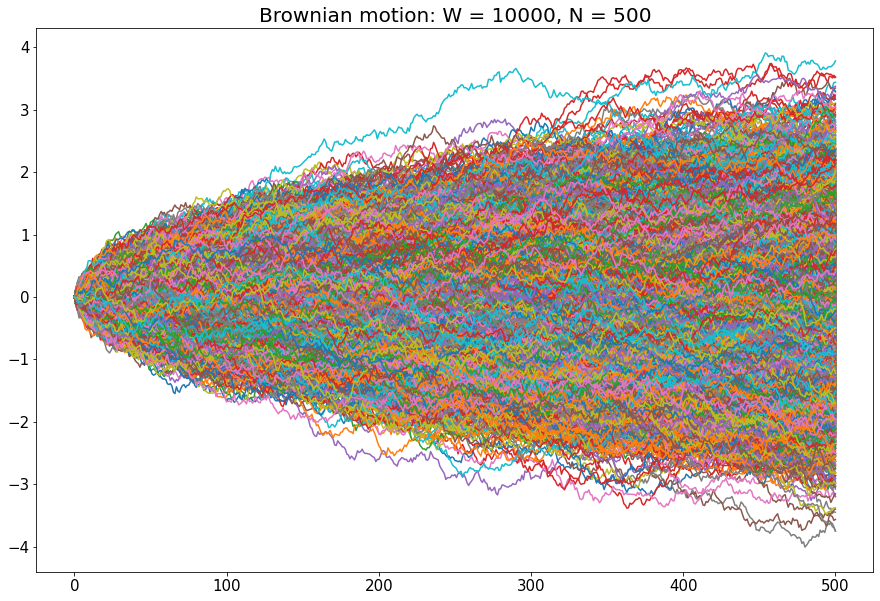

In [31]:
# simulate k runs of brownian motion with n steps
w, n, = 10000, 500
X = [brownian_motion(n) for i in range (w)]

# plot all brownian motion paths
for i in range(w):
    plt.plot(X[i])

plt.title(f"Brownian motion: W = {w}, N = {n}")
plt.show()

In [32]:
# convert X to a numpy array
X = np.array(X)

# Test normality of the brownian motion at every step
from scipy.stats import shapiro

normal, not_normal = 0, 0

for i in range(1, n+1):
    for j in range(i+1, n+1):
        Xij = X[:, j] - X[:, i]
        stat, p = shapiro(Xij)
        # print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p <= alpha:
            not_normal += 1
            # print(f'Increment between times = ({i}, {j}) does not look Gaussian (reject H0)')
        else:
            normal += 1

print(f"Of a total of {normal + not_normal} increments, {normal} are normal and {not_normal} are not normal")

C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Of a total of 124750 increments, 122413 are normal and 2337 are not normal


In [34]:
# Test independence of the brownian motion at every pair of steps
from scipy.stats import spearmanr

dependent, independent = 0, 0

for i in range(1, n):
    for j in range(i+1, n):
        Di = X[:, i+1] - X[:, i]
        Dj = X[:, j+1] - X[:, j]
        stat, p = spearmanr(Di, Dj)
        # print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p <= alpha:
            dependent += 1
            # print(f'Samples at time = {i} and {j} are not independent (reject H0)')
        else:
            independent += 1

print(f"Of a total of {dependent + independent} pairs, {independent} are independent and {dependent} are not independent")

KeyboardInterrupt: 

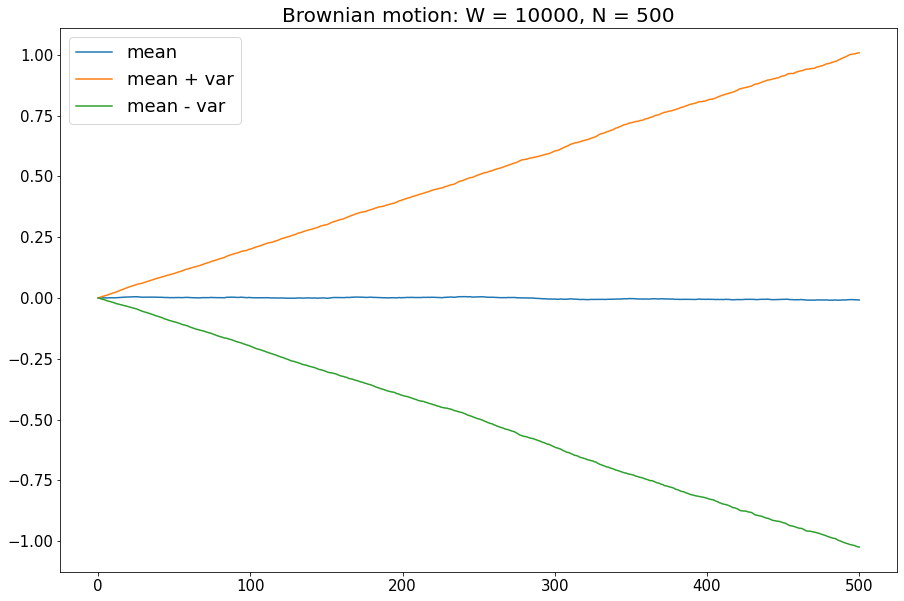

In [ ]:
# calculate the mean and variance of each column
mean = np.mean(X, axis=0)
var = np.var(X, axis=0)

# plot the mean and variance
plt.title(f"Brownian motion: W = {w}, N = {n}")
plt.plot(mean, label="mean")
plt.plot(mean + var, label="mean + var")
plt.plot(mean - var, label="mean - var")
plt.legend()
plt.show()